# Testing for Cointegration and Stationarity

In [2]:
# API to be used
import yfinance as yf
# principal data manipulation tools
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# data visualization
import seaborn as sns

# math
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS # least squares
from statsmodels.tsa.stattools import adfuller # augmented dicky fuller test
from statsmodels.tsa.stattools import coint # cointegration (not corrrelation)
from sklearn.model_selection import train_test_split
import datetime

# GUI
from ipywidgets import widgets, interact
from IPython.display import display

# magic
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# local imports
# %run dictionary.ipynb

### Add securities below one at a time

In [3]:
ticker_list = []

add_ticker = widgets.Text(
    value = '',
    placeholder = 'Type a valid Ticker',
    description = 'Ticker name:',
)

display(add_ticker)


def callback(widget):
    ticker_list.append(widget.value) 
    
add_ticker.on_submit(callback)

# TODO: functionality for multiple 
def multiple_securities():
    return

Text(value='', description='Ticker name:', placeholder='Type a valid Ticker')

In [8]:
# sample list
print(ticker_list)
print()
print(len(ticker_list))

['AAPL', 'MSFT', 'FB', 'BOX', 'U', 'CRM', 'TWTR', 'SNAP', 'AMD', 'SQ', 'ABNB', 'PLTR', 'AMZN', 'TSLA', 'ROKU', 'NVDA', 'GOOG', 'NFLX', 'UBER', 'LYFT']

20


In [9]:
# scratch
ticker = yf.Ticker(ticker_list[0])
today = datetime.datetime.today()
hist = ticker.history(start = '2020-01-01', end = today)
hist = hist['Close']
hist[0]

73.98847198486328

### DataFrame set up

In [10]:
# preserve API calls when running this cell 
my_dict = {}
today = datetime.datetime.today()
# create a dictionary with all of the tickers as keys and all of the values in the form [Date, Close]
for i in range(len(ticker_list)):
    ticker = yf.Ticker(ticker_list[i])
#     about two years of data
    hist = ticker.history(start = '2020-01-01', end = today)
#     iterate over the hist data
    for j in range(len(hist)):
        my_dict[ticker_list[i]] = hist['Close']

    


In [11]:
df = pd.DataFrame(my_dict, index = hist['Close'].index)
# drop NaN values, which will mess with the statistics
df.dropna(inplace=True)
df


# df.from_dict(my_dict)
# s = pd.Series
# s.to_dict(hist['Close'])

,AAPL,MSFT,FB,BOX,U,CRM,TWTR,SNAP,AMD,SQ,ABNB,PLTR,AMZN,TSLA,ROKU,NVDA,GOOG,NFLX,UBER,LYFT
Date,,,,,,,,,,,,,,,,,,,,
2020-12-10,122.484909,208.770020,277.119995,17.350000,158.179993,222.919998,51.209999,53.150002,91.660004,217.250000,144.710007,27.040001,3101.489990,627.070007,321.989990,129.609283,1775.329956,501.089996,54.349998,48.110001
2020-12-11,121.659996,211.487244,273.549988,17.370001,152.500000,222.419998,51.439999,53.330002,91.650002,216.589996,139.250000,27.200001,3116.419922,609.989990,330.869995,130.018936,1781.770020,503.220001,52.630001,46.869999
2020-12-14,121.033852,212.419434,274.190002,17.900000,146.720001,221.270004,52.020000,51.599998,94.779999,215.860001,130.000000,27.240000,3156.969971,639.830017,324.320007,132.971344,1760.060059,522.419983,51.459999,46.770000
2020-12-15,127.096474,212.350021,275.549988,18.270000,144.580002,220.149994,52.820000,51.349998,97.120003,219.990005,124.800003,26.430000,3165.120117,633.250000,320.140015,133.488403,1767.770020,519.780029,51.000000,49.299999
2020-12-16,127.026901,217.457199,275.670013,18.850000,146.690002,223.619995,54.029999,51.650002,96.849998,227.080002,137.990005,25.920000,3240.959961,622.770020,325.820007,132.309448,1763.000000,524.830017,50.490002,49.910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-16,172.259995,324.899994,334.899994,25.629999,133.740005,253.119995,43.130001,44.700001,138.639999,165.880005,156.380005,18.340000,3377.419922,926.919983,219.009995,283.869995,2896.770020,591.059998,37.700001,37.459999
2021-12-17,171.139999,323.799988,333.790009,26.219999,138.410004,252.929993,43.070000,45.290001,137.750000,167.059998,157.910004,19.059999,3400.350098,932.570007,236.460007,278.010010,2856.060059,586.729980,39.680000,38.070000
2021-12-20,169.750000,319.910004,325.450012,25.930000,137.289993,247.210007,42.980000,44.419998,135.800003,158.300003,157.229996,17.959999,3341.580078,899.940002,228.059998,277.190002,2848.030029,593.739990,39.700001,38.619999


### Visualizing the Data

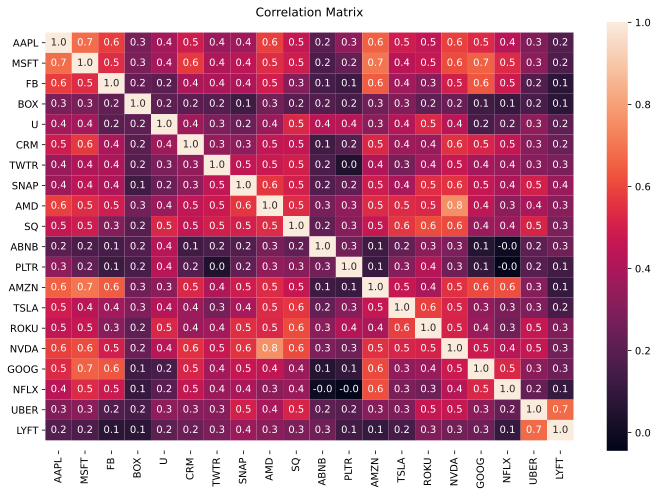

In [28]:
train, test = train_test_split(df, test_size=0.5, shuffle=False)
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(train.pct_change().corr(method='pearson'), ax=ax, annot=True, fmt='.1f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix')
plt.tight_layout()


### Cointegration

[('U', 'TSLA')]


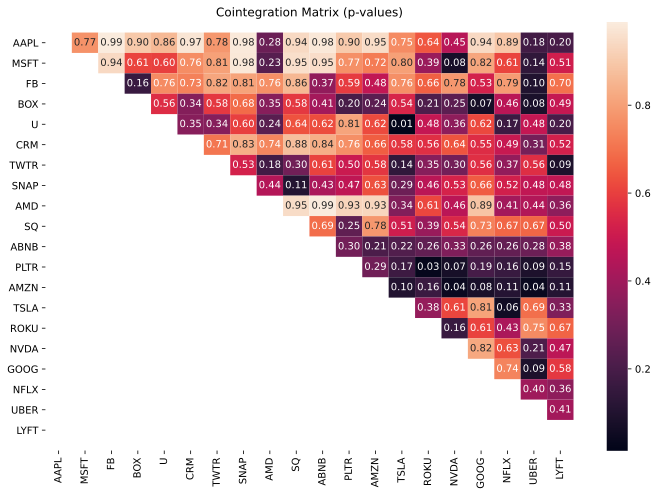

In [31]:
# strong evidence against the null hypothesis
strict_pvalue = 0.01
# weak evidence against the null hypothesis
loose_pvalue = 0.07 

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append((keys[i], keys[j]))

    return pvalue_matrix, pairs

pvalues, pairs = find_cointegrated_pairs(df)
# these are the pairs in which 
print(pairs)

# print heatmap
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(pvalues, xticklabels=train.columns, yticklabels=train.columns, annot=True, fmt='.2f', mask=(pvalues >= 0.99), ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Cointegration Matrix (p-values)')
plt.tight_layout()

In [ ]:
# Everything from here below is from https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916 

In [ ]:
# using widgets

widgets.IntSlider(
    min = 0,
    max = len(ticker_dict) - 1,
    step = 1,
    description = 'Slider:',
    value = 0
)

slider = widgets.IntSlider()
display(slider)

IntSlider(value=0)

In [ ]:
# linking two widgets
slider = widgets.IntSlider()
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

IntSlider(value=0)

IntText(value=0)

Link(source=(IntSlider(value=0), 'value'), target=(IntText(value=0), 'value'))

In [ ]:
print(dir(widgets))

['Accordion', 'AppLayout', 'Audio', 'BoundedFloatText', 'BoundedIntText', 'Box', 'Button', 'ButtonStyle', 'CallbackDispatcher', 'Checkbox', 'Color', 'ColorPicker', 'Combobox', 'Controller', 'CoreWidget', 'DOMWidget', 'DatePicker', 'Datetime', 'Dropdown', 'FileUpload', 'FloatLogSlider', 'FloatProgress', 'FloatRangeSlider', 'FloatSlider', 'FloatText', 'GridBox', 'GridspecLayout', 'HBox', 'HTML', 'HTMLMath', 'Image', 'IntProgress', 'IntRangeSlider', 'IntSlider', 'IntText', 'Label', 'Layout', 'NumberFormat', 'Output', 'Password', 'Play', 'RadioButtons', 'Select', 'SelectMultiple', 'SelectionRangeSlider', 'SelectionSlider', 'SliderStyle', 'Style', 'Tab', 'Text', 'Textarea', 'ToggleButton', 'ToggleButtons', 'ToggleButtonsStyle', 'TwoByTwoLayout', 'VBox', 'Valid', 'ValueWidget', 'Video', 'Widget', '__builtins__', '__cached__', '__doc__', '__file__', '__jupyter_widgets_base_version__', '__jupyter_widgets_controls_version__', '__loader__', '__name__', '__package__', '__path__', '__protocol_vers

In [ ]:
# widget events
btn = widgets.Button(description='Medium')
display(btn)
def btn_eventhandler(obj):
    print(ticker_dict[0].format(obj.description))
btn.on_click(btn_eventhandler)

Button(description='Medium', style=ButtonStyle())

AAPL
